# Imports

In [1]:
#Import the necessary methods from tweepy library
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from collections import Counter
#from config import *
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy import API
from tweepy import Cursor
import datetime

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag

import time
from collections import defaultdict
import collections
from numpy import linalg as la
import re
import math

# Tweet Gathering

### Collecting tweets using tweepy.Cursor.  

We have used Cursor insted of Filter to collect tweets from different days and also to obtain a more accurate value of retweets and likes.

In [2]:
## access token informations 
access_token1 = ""
access_token_secret1 = ""

consumer_key1 = ""
consumer_secret1 = ""

auth = OAuthHandler(consumer_key1, consumer_secret1)
auth.set_access_token(access_token1, access_token_secret1)
api = API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [4]:
%%time

OUTPUT_FILENAME = "results2224.json"
max_tweets = 35000

# keywords we may want decide to track 
TRACKING_KEYWORDS = ["#Covid-19","#COVID-19","covid","coronavirus","quarantine","#StayHomeStaySafe","#FlattenTheCurve","vaccine",
                     "#vaccine","#SputnikV","#Moderna","#Pfizer"]
keywords_query = ' '.join([word + ' OR' for word in TRACKING_KEYWORDS])[:-3]

cursor = Cursor(api.search,q=keywords_query,since="2020-11-22",until="2020-11-24",lang="en").items(max_tweets)

count = 0
# Write json tweets to file
with open(OUTPUT_FILENAME,'a') as file:
    for tweet in cursor:
        file.write(json.dumps(tweet._json)+'\n')  
        count += 1
        if (count%100) == 0:
            print('Tweets gathered %d / %d' % (count,max_tweets))

Tweets gathered 100 / 35000
Tweets gathered 200 / 35000
Tweets gathered 300 / 35000
Tweets gathered 400 / 35000
Tweets gathered 500 / 35000
Tweets gathered 600 / 35000
Tweets gathered 700 / 35000
Tweets gathered 800 / 35000
Tweets gathered 900 / 35000
Tweets gathered 1000 / 35000
Tweets gathered 1100 / 35000
Tweets gathered 1200 / 35000
Tweets gathered 1300 / 35000
Tweets gathered 1400 / 35000
Tweets gathered 1500 / 35000
Tweets gathered 1600 / 35000
Tweets gathered 1700 / 35000
Tweets gathered 1800 / 35000
Tweets gathered 1900 / 35000
Tweets gathered 2000 / 35000
Tweets gathered 2100 / 35000
Tweets gathered 2200 / 35000
Tweets gathered 2300 / 35000
Tweets gathered 2400 / 35000
Tweets gathered 2500 / 35000


Rate limit reached. Sleeping for: 784


Tweets gathered 2600 / 35000
Tweets gathered 2700 / 35000
Tweets gathered 2800 / 35000
Tweets gathered 2900 / 35000
Tweets gathered 3000 / 35000
Tweets gathered 3100 / 35000
Tweets gathered 3200 / 35000
Tweets gathered 3300 / 35000
Tweets gathered 3400 / 35000
Tweets gathered 3500 / 35000
Tweets gathered 3600 / 35000
Tweets gathered 3700 / 35000
Tweets gathered 3800 / 35000
Tweets gathered 3900 / 35000
Tweets gathered 4000 / 35000
Tweets gathered 4100 / 35000
Tweets gathered 4200 / 35000
Tweets gathered 4300 / 35000
Tweets gathered 4400 / 35000
Tweets gathered 4500 / 35000
Tweets gathered 4600 / 35000
Tweets gathered 4700 / 35000
Tweets gathered 4800 / 35000
Tweets gathered 4900 / 35000
Tweets gathered 5000 / 35000


Rate limit reached. Sleeping for: 782


Tweets gathered 5100 / 35000
Tweets gathered 5200 / 35000
Tweets gathered 5300 / 35000
Tweets gathered 5400 / 35000
Tweets gathered 5500 / 35000
Tweets gathered 5600 / 35000
Tweets gathered 5700 / 35000
Tweets gathered 5800 / 35000
Tweets gathered 5900 / 35000
Tweets gathered 6000 / 35000
Tweets gathered 6100 / 35000
Tweets gathered 6200 / 35000
Tweets gathered 6300 / 35000
Tweets gathered 6400 / 35000
Tweets gathered 6500 / 35000
Tweets gathered 6600 / 35000
Tweets gathered 6700 / 35000
Tweets gathered 6800 / 35000
Tweets gathered 6900 / 35000
Tweets gathered 7000 / 35000
Tweets gathered 7100 / 35000
Tweets gathered 7200 / 35000
Tweets gathered 7300 / 35000
Tweets gathered 7400 / 35000
Tweets gathered 7500 / 35000
Tweets gathered 7600 / 35000


Rate limit reached. Sleeping for: 783


Tweets gathered 7700 / 35000
Tweets gathered 7800 / 35000
Tweets gathered 7900 / 35000
Tweets gathered 8000 / 35000
Tweets gathered 8100 / 35000
Tweets gathered 8200 / 35000
Tweets gathered 8300 / 35000
Tweets gathered 8400 / 35000
Tweets gathered 8500 / 35000
Tweets gathered 8600 / 35000
Tweets gathered 8700 / 35000
Tweets gathered 8800 / 35000
Tweets gathered 8900 / 35000
Tweets gathered 9000 / 35000
Tweets gathered 9100 / 35000
Tweets gathered 9200 / 35000
Tweets gathered 9300 / 35000
Tweets gathered 9400 / 35000
Tweets gathered 9500 / 35000
Tweets gathered 9600 / 35000
Tweets gathered 9700 / 35000
Tweets gathered 9800 / 35000
Tweets gathered 9900 / 35000
Tweets gathered 10000 / 35000
Tweets gathered 10100 / 35000


Rate limit reached. Sleeping for: 761


Tweets gathered 10200 / 35000
Tweets gathered 10300 / 35000
Tweets gathered 10400 / 35000
Tweets gathered 10500 / 35000
Tweets gathered 10600 / 35000
Tweets gathered 10700 / 35000
Tweets gathered 10800 / 35000
Tweets gathered 10900 / 35000
Tweets gathered 11000 / 35000
Tweets gathered 11100 / 35000
Tweets gathered 11200 / 35000
Tweets gathered 11300 / 35000
Tweets gathered 11400 / 35000
Tweets gathered 11500 / 35000
Tweets gathered 11600 / 35000
Tweets gathered 11700 / 35000
Tweets gathered 11800 / 35000
Tweets gathered 11900 / 35000
Tweets gathered 12000 / 35000
Tweets gathered 12100 / 35000
Tweets gathered 12200 / 35000
Tweets gathered 12300 / 35000
Tweets gathered 12400 / 35000
Tweets gathered 12500 / 35000
Tweets gathered 12600 / 35000
Tweets gathered 12700 / 35000


Rate limit reached. Sleeping for: 760


Tweets gathered 12800 / 35000
Tweets gathered 12900 / 35000
Tweets gathered 13000 / 35000
Tweets gathered 13100 / 35000
Tweets gathered 13200 / 35000
Tweets gathered 13300 / 35000
Tweets gathered 13400 / 35000
Tweets gathered 13500 / 35000
Tweets gathered 13600 / 35000
Tweets gathered 13700 / 35000
Tweets gathered 13800 / 35000
Tweets gathered 13900 / 35000
Tweets gathered 14000 / 35000
Tweets gathered 14100 / 35000
Tweets gathered 14200 / 35000
Tweets gathered 14300 / 35000
Tweets gathered 14400 / 35000
Tweets gathered 14500 / 35000
Tweets gathered 14600 / 35000
Tweets gathered 14700 / 35000
Tweets gathered 14800 / 35000
Tweets gathered 14900 / 35000
Tweets gathered 15000 / 35000
Tweets gathered 15100 / 35000
Tweets gathered 15200 / 35000
Tweets gathered 15300 / 35000


Rate limit reached. Sleeping for: 756


Tweets gathered 15400 / 35000
Tweets gathered 15500 / 35000
Tweets gathered 15600 / 35000
Tweets gathered 15700 / 35000
Tweets gathered 15800 / 35000
Tweets gathered 15900 / 35000
Tweets gathered 16000 / 35000
Tweets gathered 16100 / 35000
Tweets gathered 16200 / 35000
Tweets gathered 16300 / 35000
Tweets gathered 16400 / 35000
Tweets gathered 16500 / 35000
Tweets gathered 16600 / 35000
Tweets gathered 16700 / 35000
Tweets gathered 16800 / 35000
Tweets gathered 16900 / 35000
Tweets gathered 17000 / 35000
Tweets gathered 17100 / 35000
Tweets gathered 17200 / 35000
Tweets gathered 17300 / 35000
Tweets gathered 17400 / 35000
Tweets gathered 17500 / 35000
Tweets gathered 17600 / 35000
Tweets gathered 17700 / 35000
Tweets gathered 17800 / 35000
Tweets gathered 17900 / 35000


Rate limit reached. Sleeping for: 762


Tweets gathered 18000 / 35000
Tweets gathered 18100 / 35000
Tweets gathered 18200 / 35000
Tweets gathered 18300 / 35000
Tweets gathered 18400 / 35000
Tweets gathered 18500 / 35000
Tweets gathered 18600 / 35000
Tweets gathered 18700 / 35000
Tweets gathered 18800 / 35000
Tweets gathered 18900 / 35000
Tweets gathered 19000 / 35000
Tweets gathered 19100 / 35000
Tweets gathered 19200 / 35000
Tweets gathered 19300 / 35000
Tweets gathered 19400 / 35000
Tweets gathered 19500 / 35000
Tweets gathered 19600 / 35000
Tweets gathered 19700 / 35000
Tweets gathered 19800 / 35000
Tweets gathered 19900 / 35000
Tweets gathered 20000 / 35000
Tweets gathered 20100 / 35000
Tweets gathered 20200 / 35000
Tweets gathered 20300 / 35000
Tweets gathered 20400 / 35000


Rate limit reached. Sleeping for: 766


Tweets gathered 20500 / 35000
Tweets gathered 20600 / 35000
Tweets gathered 20700 / 35000
Tweets gathered 20800 / 35000
Tweets gathered 20900 / 35000
Tweets gathered 21000 / 35000
Tweets gathered 21100 / 35000
Tweets gathered 21200 / 35000
Tweets gathered 21300 / 35000
Tweets gathered 21400 / 35000
Tweets gathered 21500 / 35000
Tweets gathered 21600 / 35000
Tweets gathered 21700 / 35000
Tweets gathered 21800 / 35000
Tweets gathered 21900 / 35000
Tweets gathered 22000 / 35000
Tweets gathered 22100 / 35000
Tweets gathered 22200 / 35000
Tweets gathered 22300 / 35000
Tweets gathered 22400 / 35000
Tweets gathered 22500 / 35000
Tweets gathered 22600 / 35000
Tweets gathered 22700 / 35000
Tweets gathered 22800 / 35000
Tweets gathered 22900 / 35000
Tweets gathered 23000 / 35000


Rate limit reached. Sleeping for: 765


Tweets gathered 23100 / 35000
Tweets gathered 23200 / 35000
Tweets gathered 23300 / 35000
Tweets gathered 23400 / 35000
Tweets gathered 23500 / 35000
Tweets gathered 23600 / 35000
Tweets gathered 23700 / 35000
Tweets gathered 23800 / 35000
Tweets gathered 23900 / 35000
Tweets gathered 24000 / 35000
Tweets gathered 24100 / 35000
Tweets gathered 24200 / 35000
Tweets gathered 24300 / 35000
Tweets gathered 24400 / 35000
Tweets gathered 24500 / 35000
Tweets gathered 24600 / 35000
Tweets gathered 24700 / 35000
Tweets gathered 24800 / 35000
Tweets gathered 24900 / 35000
Tweets gathered 25000 / 35000
Tweets gathered 25100 / 35000
Tweets gathered 25200 / 35000
Tweets gathered 25300 / 35000
Tweets gathered 25400 / 35000
Tweets gathered 25500 / 35000
Tweets gathered 25600 / 35000


Rate limit reached. Sleeping for: 780


Tweets gathered 25700 / 35000
Tweets gathered 25800 / 35000
Tweets gathered 25900 / 35000
Tweets gathered 26000 / 35000
Tweets gathered 26100 / 35000
Tweets gathered 26200 / 35000
Tweets gathered 26300 / 35000
Tweets gathered 26400 / 35000
Tweets gathered 26500 / 35000
Tweets gathered 26600 / 35000
Tweets gathered 26700 / 35000
Tweets gathered 26800 / 35000
Tweets gathered 26900 / 35000
Tweets gathered 27000 / 35000
Tweets gathered 27100 / 35000
Tweets gathered 27200 / 35000
Tweets gathered 27300 / 35000
Tweets gathered 27400 / 35000
Tweets gathered 27500 / 35000
Tweets gathered 27600 / 35000
Tweets gathered 27700 / 35000
Tweets gathered 27800 / 35000
Tweets gathered 27900 / 35000
Tweets gathered 28000 / 35000
Tweets gathered 28100 / 35000
Tweets gathered 28200 / 35000


Rate limit reached. Sleeping for: 779


Tweets gathered 28300 / 35000
Tweets gathered 28400 / 35000
Tweets gathered 28500 / 35000
Tweets gathered 28600 / 35000
Tweets gathered 28700 / 35000
Tweets gathered 28800 / 35000
Tweets gathered 28900 / 35000
Tweets gathered 29000 / 35000
Tweets gathered 29100 / 35000
Tweets gathered 29200 / 35000
Tweets gathered 29300 / 35000
Tweets gathered 29400 / 35000
Tweets gathered 29500 / 35000
Tweets gathered 29600 / 35000
Tweets gathered 29700 / 35000
Tweets gathered 29800 / 35000
Tweets gathered 29900 / 35000
Tweets gathered 30000 / 35000
Tweets gathered 30100 / 35000
Tweets gathered 30200 / 35000
Tweets gathered 30300 / 35000
Tweets gathered 30400 / 35000
Tweets gathered 30500 / 35000
Tweets gathered 30600 / 35000
Tweets gathered 30700 / 35000
Tweets gathered 30800 / 35000


Rate limit reached. Sleeping for: 761


Tweets gathered 30900 / 35000
Tweets gathered 31000 / 35000
Tweets gathered 31100 / 35000
Tweets gathered 31200 / 35000
Tweets gathered 31300 / 35000
Tweets gathered 31400 / 35000
Tweets gathered 31500 / 35000
Tweets gathered 31600 / 35000
Tweets gathered 31700 / 35000
Tweets gathered 31800 / 35000
Tweets gathered 31900 / 35000
Tweets gathered 32000 / 35000
Tweets gathered 32100 / 35000
Tweets gathered 32200 / 35000
Tweets gathered 32300 / 35000
Tweets gathered 32400 / 35000
Tweets gathered 32500 / 35000
Tweets gathered 32600 / 35000
Tweets gathered 32700 / 35000
Tweets gathered 32800 / 35000
Tweets gathered 32900 / 35000
Tweets gathered 33000 / 35000
Tweets gathered 33100 / 35000
Tweets gathered 33200 / 35000
Tweets gathered 33300 / 35000


Rate limit reached. Sleeping for: 780


Tweets gathered 33400 / 35000
Tweets gathered 33500 / 35000
Tweets gathered 33600 / 35000
Tweets gathered 33700 / 35000
Tweets gathered 33800 / 35000
Tweets gathered 33900 / 35000
Tweets gathered 34000 / 35000
Tweets gathered 34100 / 35000
Tweets gathered 34200 / 35000
Tweets gathered 34300 / 35000
Tweets gathered 34400 / 35000
Tweets gathered 34500 / 35000
Tweets gathered 34600 / 35000
Tweets gathered 34700 / 35000
Tweets gathered 34800 / 35000
Tweets gathered 34900 / 35000
Tweets gathered 35000 / 35000
Wall time: 3h 17min 28s


# Data preprocessing

### 'results_final.json' it contains 105000 tweets. We converted it to dataframe and preprocess it.

In [2]:
OUTPUT_FILENAME = "results_final.json"
with open(OUTPUT_FILENAME, "rb") as f:
    json_data = f.readlines()
    json_data = [json.loads(str_) for str_ in json_data]
    
df_tweets = pd.DataFrame.from_records(json_data)

In [3]:
df_tweets.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status,extended_entities,withheld_in_countries
0,Sat Nov 21 23:59:59 +0000 2020,1330299955962064896,1330299955962064896,RT @DrHoenderkamp: Have said from the start th...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,1330078923930144768,85,0,False,False,en,NaN,NaN,NaN,NaN
1,Sat Nov 21 23:59:59 +0000 2020,1330299955601399811,1330299955601399811,RT @MackayIM: On the subject of lockdowns &amp...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,39,0,False,False,en,NaN,NaN,NaN,NaN
2,Sat Nov 21 23:59:59 +0000 2020,1330299955425193985,1330299955425193985,RT @SteveBakerHW: ❌ We cannot support further ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,909,0,False,False,en,NaN,NaN,NaN,NaN
3,Sat Nov 21 23:59:59 +0000 2020,1330299955064528898,1330299955064528898,RT @FatEmperor: Excellent article on mask evid...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,NaN,773,0,False,False,en,NaN,NaN,NaN,NaN
4,Sat Nov 21 23:59:59 +0000 2020,1330299955035189253,1330299955035189253,RT @djkelly: Twice as bad as Quebec. Four time...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://tapbots.com/tweetbot"" rel=""nof...",NaN,None,...,NaN,27,0,False,False,en,False,NaN,NaN,NaN


In [4]:
print('Number of original tweets:',len([w for w in df_tweets['text'] if w[0:2]!='RT']))
print('Number of retweets:',len([w for w in df_tweets['text'] if w[0:2]=='RT']))

Number of original tweets: 33766
Number of retweets: 71234


In [5]:
punctuation = string.punctuation.replace('#','')+'…'

def preprocess_tweet(tweets_series):
    # Lowercasing text
    tweets_series = tweets_series.apply(lambda x: x.lower())

    # Remove URLS (https and www), mentions and rt
    tweets_series = tweets_series.apply(lambda x: re.sub(r'https?//\S+|www.\S+|@\w*|^rt','', x))
    
    #Removing numbers
    tweets_series=tweets_series.apply(lambda x: re.sub(r"([0-9])",'', x))

    # Remove punctuation except # (hashtags)
    tweets_series = tweets_series.apply(lambda x: "".join([char for char in x if char not in punctuation]))

    # Replacing symbol ’ for ' as they mean the same and it is needed to correctly remove stopwords
    tweets_series = tweets_series.apply(lambda x: x.replace("’","").replace('“',"").replace('”',''))
    
    #Removing emojis
    tweets_series=tweets_series.apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

    # Tokenize text 
    tweets_series = tweets_series.apply(lambda x: x.split())

    # Removing stop words
    stop_words = stopwords.words('english')
    tweets_series = tweets_series.apply(lambda x: [word for word in x if word not in stop_words])
                
    # Stemming
    porter = PorterStemmer()
    tweets_series = tweets_series.apply(lambda x: [porter.stem(word) for word in x]) 

    return tweets_series

In [6]:
# Anonymizes usernames both appearing in the text and in the user column
def anonymize(data): 
    # Removing character ':' (Appeared at the end of retweeted users)
    # Won't affect correct mapping as usernames cannot have ':' inside the name
    text = data['text'].apply(lambda x: "".join([char for char in x if char != ':']))       
    
    # Obtaining usernames both in mentions and in the username column
    users = [word[1:] for x in text for word in x.split() if (word[0] == '@')]
    users = users + list(data['user'])
    
    # Obtaining a mapping using unique function
    unq,idx = np.unique(users,return_inverse=True)
    mapping_user_to_id = dict(zip(unq[idx],idx))
    
    # Anonymizing mentions
    data['text'] = text.apply(lambda x: ' '.join(['@'+str(mapping_user_to_id[word[1:]]) if (word[0] == '@') else word for word in x.split()]))
    
    # Anonymizing users
    data['user'] = data['user'].apply(lambda x: str(mapping_user_to_id[x]))

In [7]:
# Returns list of ids of tweets with empty text (after preprocessing)
def get_empty_texts_ids(tweets_series):
    to_drop = [i for i, text in tweets_series.items() if text == []]
    return to_drop

In [8]:
data = pd.DataFrame()

data['text'] = df_tweets['text']
data['user'] = df_tweets['user'].apply(lambda x: x['screen_name'])
data['url'] = 'https://twitter.com/twitter/statuses/'+ df_tweets['id_str']

# Anonymize users 
mapping_user_to_id = anonymize(data)
data['original_text'] = data['text']
data['text'] = preprocess_tweet(data['text'])
data['date'] = df_tweets['created_at']
data['hashtags'] = df_tweets["entities"].apply(lambda x: x["hashtags"])
data['likes'] = df_tweets['favorite_count']
data['retweets'] = df_tweets['retweet_count'] 
data.drop(get_empty_texts_ids(data['text']),inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

,text,user,url,original_text,date,hashtags,likes,retweets
0,"[said, start, asymptomat, spread, minim, exist...",13853,https://twitter.com/twitter/statuses/133029995...,RT @15693 Have said from the start that asympt...,Sat Nov 21 23:59:59 +0000 2020,[],0,85
1,"[subject, lockdown, amp, mental, health, partn...",83141,https://twitter.com/twitter/statuses/133029995...,RT @33133 On the subject of lockdowns &amp; me...,Sat Nov 21 23:59:59 +0000 2020,[],0,39
2,"[cannot, support, restrict, unless, govern, de...",80337,https://twitter.com/twitter/statuses/133029995...,RT @49266 ❌ We cannot support further restrict...,Sat Nov 21 23:59:59 +0000 2020,[],0,909
3,"[excel, articl, mask, evidencebas, onestopshop...",24885,https://twitter.com/twitter/statuses/133029995...,RT @18170 Excellent article on mask evidence-b...,Sat Nov 21 23:59:59 +0000 2020,[],0,773
4,"[twice, bad, quebec, four, time, wors, ontario...",4144,https://twitter.com/twitter/statuses/133029995...,RT @70004 Twice as bad as Quebec. Four times w...,Sat Nov 21 23:59:59 +0000 2020,[],0,27


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104797 entries, 0 to 104796
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   text           104797 non-null  object
 1   user           104797 non-null  object
 2   url            104797 non-null  object
 3   original_text  104797 non-null  object
 4   date           104797 non-null  object
 5   hashtags       104797 non-null  object
 6   likes          104797 non-null  int64 
 7   retweets       104797 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ MB


In [12]:
#Creating the original and retweet dataset
N=len(data)
original_ids=[i for i in range(N) if data.original_text[i][0:2]!="RT"]
retweet_ids=[i for i in range(N) if data.original_text[i][0:2]=="RT"]

In [13]:
original=data.loc[original_ids]
original=original.reset_index(drop=True)
retweet=data.loc[retweet_ids]
retweet=retweet.reset_index(drop=True)

# Inverted Index Creation

In [14]:
def create_index_tfidf(data, numDocuments):
    """
    Implement the inverted index and compute tf, df and idf
    
    Argument:
    data -- Dataset containing original tweets
    numDocuments -- total number of documents in data
    
    Returns:
    index - the inverted index containing terms as keys and the corresponding 
            frequency these keys appears in as values.
    tf - normalized term frequency for each term in each document
    df - number of documents each term appear in
    idf - inverse document frequency of each term
    """
    index=defaultdict(list)
    tf=defaultdict(list) 
    df=defaultdict(int)  
    idf=defaultdict(float)
    
    n_rows = data.shape[0] 
    for tweet_id in range(n_rows):    
        terms = data['text'][tweet_id] #['term1','term2',....]       
        
        ## ===============================================================        
        ## create the index for the **current page** and store it in termdictPage
        ## termdictPage ==> { ‘term1’: [currentdoc, count], ...,‘termn’: [currentdoc, count]}
        
        ## Example: if the curr_doc has id 1 and his text is 
        ## "web retrieval information retrieval":
        
        ## termdictPage ==> { ‘web’: [1, 1], ‘retrieval’: [1, 2], ‘information’: [1, 1]}
        
        ## the term ‘web’ appears 1 time in document 1. 
        ## the term ‘retrieval’ appears 2 times in document 1.
        ## ===============================================================

        termdictPage={}

        for term in terms: 
            try:
                # if the term is already in the dict add one count
                termdictPage[term][1] += 1
            except:
                # Add the new term 
                termdictPage[term]=[tweet_id,1] 

        #normalize term frequencies
        # Compute the denominator to normalize term frequencies (formula 2 above)
        # norm is the same for all terms of a document.
        
        norm = np.sqrt(sum(val[1]**2 for val in termdictPage.values()))

        #calculate the tf(dividing the term frequency by the above computed norm) and df weights
        for term, posting in termdictPage.items():     
            # append the tf for current term (tf = term frequency in current doc/norm)
            tf[term].append(np.round(posting[1]/norm,4)) 
            #increment the document frequency of current term (number of documents containing the current term)
            df[term] += len(termdictPage[term])  # increment df for current term
        
        #merge the current page index with the main index
        for termpage, postingpage in termdictPage.items():
            index[termpage].append(postingpage)
            
    # Compute idf
    for term in df:
        idf[term] = np.round(np.log(float(numDocuments/df[term])),4)
            
    return index, tf, df, idf


In [15]:
start_time = time.time()
numDocuments = original.shape[0] 
index, tf, df, idf = create_index_tfidf(original,numDocuments)
print("Total time to create the index: {} seconds" .format(np.round(time.time() - start_time,2)))

Total time to create the index: 4.57 seconds


# Storing search engine structures and preprocessed dataset

In [15]:
def write_dict_to_file(filename,dictionary):
    with open(filename, 'w') as file:
        file.write(json.dumps(dictionary))
    return 

# Saving the data structures needed to run the Search Engine to json files
write_dict_to_file('index.json',index)
write_dict_to_file('tf.json',tf)
write_dict_to_file('idf.json',idf)

In [16]:
# Saving the preprocessed dataframes data, original tweets and retweets.
data.to_csv('tweet_dataset.csv',index=False)
original.to_csv('originals.csv',index=False)
retweet.to_csv('retweets.csv',index=False)

# Training and saving Word2Vector Model

In [33]:
from gensim.models import Word2Vec

# Training the word2vector model. The embedded dimension is 30 and it will contain each word 
# that appears in the preprocessed text of the original tweets.
w2v_model = Word2Vec(original['text'], size=30, min_count=1, window=4, sg=1,workers=4)
w2v_model.save("word2vec.model")

In [21]:
from gensim.models import Word2Vec
# Loading the model created
w2v_model = Word2Vec.load("word2vec.model")
print('Example of some words used for the Word2Vector model')
print(list(w2v_model.wv.vocab.keys())[0:5])
print('Most similar words to covid')
print(w2v_model.wv.most_similar('covid', topn=5))

Example of some words used for the Word2Vector model
['hey', 'houston', '#washyourhand', '#stayhomestaysaf', '#wearamask']
Most similar words to covid
[('coronaviru', 0.8533441424369812), ('fals', 0.843826413154602), ('cov', 0.8425662517547607), ('whale', 0.8397070169448853), ('also', 0.8377404808998108)]


# Training and saving TSNE output

In [18]:
from sklearn.manifold import TSNE

# Declaring TSNE model that will transform the words embedded from 30 dimensions to 2 dimensions.
# We are using a perplexity of 40 since our dataset is quite big, the default value is 30.
tsne_model=TSNE(n_components=2, perplexity=40,random_state=33)

In [22]:
def emb_vec(tweet,model=w2v_model):
    # Appending in a list the embedded representation of all the words in the tweet if they are in vocab
    query_vectors=[w2v_model.wv.word_vec(word) for word in tweet if word in w2v_model.wv.vocab]
    # In case this list of vectors have length grater than 0 we compute the average value
    if len(query_vectors)>0:
        vec=np.average(np.array(query_vectors),axis=0)
        return vec/np.linalg.norm(vec)
    # Otherwise we return a 0
    return np.zeros((1,1))

In [23]:
embedded_tweets=[emb_vec(tweet,model=w2v_model) for tweet in original['text']]
final_embedded=[vec for vec in embedded_tweets if vec.any()!=0]
# We asserted that there are no tweets without any word in w2v_model.wv.vocab
assert len(embedded_tweets)==len(final_embedded)

In [46]:
# Reducing the dimensionality of the embedded_tweets to 2 components.
low_dim_embedded=tsne_model.fit_transform(embedded_tweets)

In [48]:
# Saving output obtained by TSNE. The dimensions are #(original tweets)x2components
np.save('tsne_output.npy', low_dim_embedded)
low_dim_embedded.shape

(33600, 2)

# Exploratory Data Analysis

In [24]:
#Data info shows us basic information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104797 entries, 0 to 104796
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   text           104797 non-null  object
 1   user           104797 non-null  object
 2   url            104797 non-null  object
 3   original_text  104797 non-null  object
 4   date           104797 non-null  object
 5   hashtags       104797 non-null  object
 6   likes          104797 non-null  int64 
 7   retweets       104797 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ MB


In [25]:
print('Number of unique users:',len(data.user.unique()))
print('Number of original tweets:',len(original))
print('Number of retweets:',len(retweet))
print('Time needed to collect the data: 10 hours 09 minutes')
print('Keywords list:')
TRACKING_KEYWORDS = ["#Covid-19","#COVID-19","covid","coronavirus","quarantine","#StayHomeStaySafe","#FlattenTheCurve","vaccine",
                     "#vaccine","#SputnikV","#Moderna","#Pfizer"]
print(TRACKING_KEYWORDS)

Number of unique users: 83482
Number of original tweets: 33600
Number of retweets: 71197
Time needed to collect the data: 10 hours 09 minutes
Keywords list:
['#Covid-19', '#COVID-19', 'covid', 'coronavirus', 'quarantine', '#StayHomeStaySafe', '#FlattenTheCurve', 'vaccine', '#vaccine', '#SputnikV', '#Moderna', '#Pfizer']


In [26]:
# Creating a corpus with the frequency of each term in index
corpus={}
for key in index.keys():
    freq=np.sum([w[1] for w in index[key]])
    corpus[key]=freq

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color ='white',  min_font_size = 5 ).generate_from_frequencies(corpus)

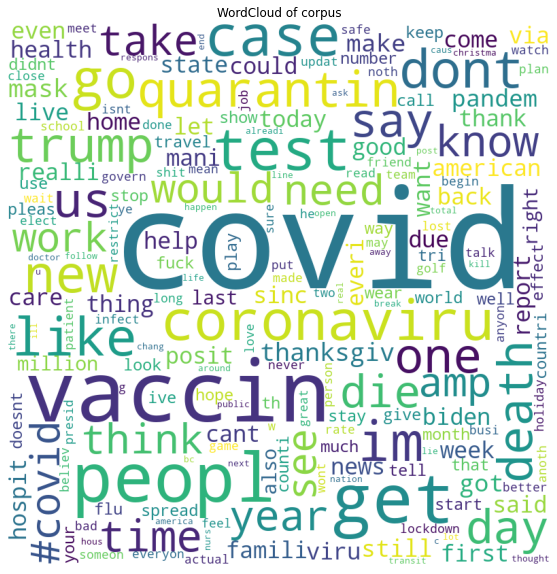

In [28]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.title('WordCloud of corpus')
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

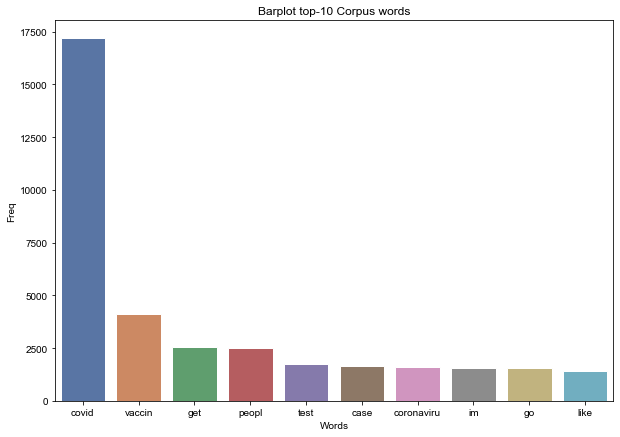

In [29]:
most_freq=list(wordcloud.words_.keys())[0:10]
freq_df=pd.DataFrame()
freq_df['Words']=most_freq
freq_df['Freq']=[corpus[w] for w in most_freq]
plt.figure(figsize=(10,7))
plt.title('Barplot top-10 Corpus words')
sns.set()
for w in most_freq:
    sns.barplot(x='Words',y='Freq',data=freq_df)
plt.show()

C:\Users\Marc\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


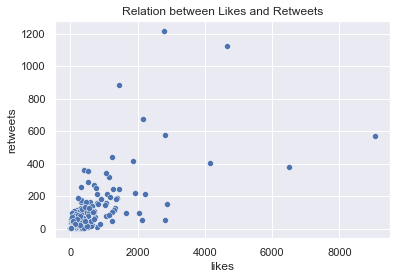

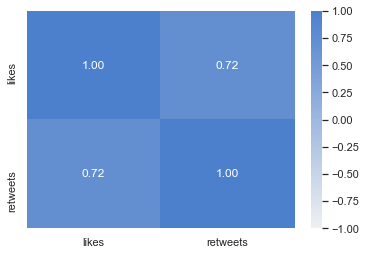

In [30]:
w=data[(data.likes<10000) & (data.likes>0) & (data.retweets<1500) & (data.retweets>0)]
plt.title('Relation between Likes and Retweets')
sns.scatterplot(w.likes,w.retweets)
plt.show()

res=w.corr()
colmap = sns.light_palette((0.3,0.5,0.8), as_cmap=True)
sns.heatmap(res,annot=True,fmt=".2f",vmin=-1, vmax=1, cmap=colmap)
plt.show()

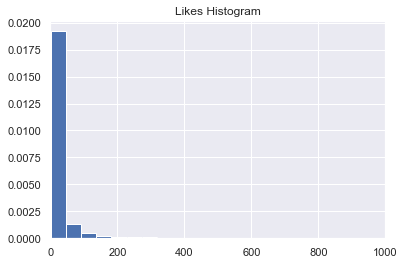

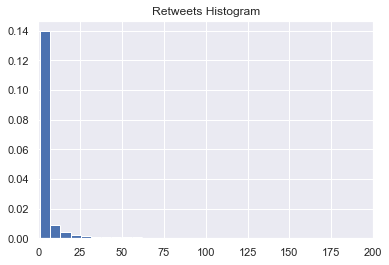

In [31]:
plt.title('Likes Histogram')
w.likes.hist(bins=200,density=1)
plt.xlim((0,1000))
plt.show()
plt.title('Retweets Histogram')
w.retweets.hist(bins=200,density=1)
plt.xlim((0,200))
plt.show()